In [1]:
import os
import sys
import random
import xml.etree.ElementTree as ET

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Check versions of libraries
print(f"Python: {sys.version}")
print(f"matplotlib: {mpl.__version__}")
print(f"numpy: {np.__version__}")
print(f"OpenCV: {cv2.__version__}")
print(f"tensorflow: {tf.__version__}")

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Python: 3.8.5 (default, May 27 2021, 13:30:53) 
[GCC 9.3.0]
matplotlib: 3.3.3
numpy: 1.18.5
OpenCV: 4.5.2
tensorflow: 2.3.0


In [2]:
CURRENT_DIR = os.getcwd()
TRAINING_SET_DIR = os.path.join(CURRENT_DIR, "images", "training_set")
VALIDATION_SET_DIR = os.path.join(CURRENT_DIR, "images", "validation_set")

BATCH_SIZE = 16
EPOCHS = 10
IMAGE_WIDTH = 300
IMAGE_HEIGHT = 300

In [3]:
def image_view(images):
    """Displays a 3x3 subplot of randomly selected images"""

    fig, ax = plt.subplots(3, 3, figsize=(12, 12))

    for i in range(3):
        for j in range(3):
            # Selects a random image and displays it
            index = random.randint(0, len(images) - 1)
            ax[i, j].imshow(images[index])

            # Displays the breed's name as the title
            # ax[i, j].set_title(f"Breed: {labels[index]}")

    plt.show()

Found 65228 images belonging to 130 classes.
Found 5200 images belonging to 130 classes.


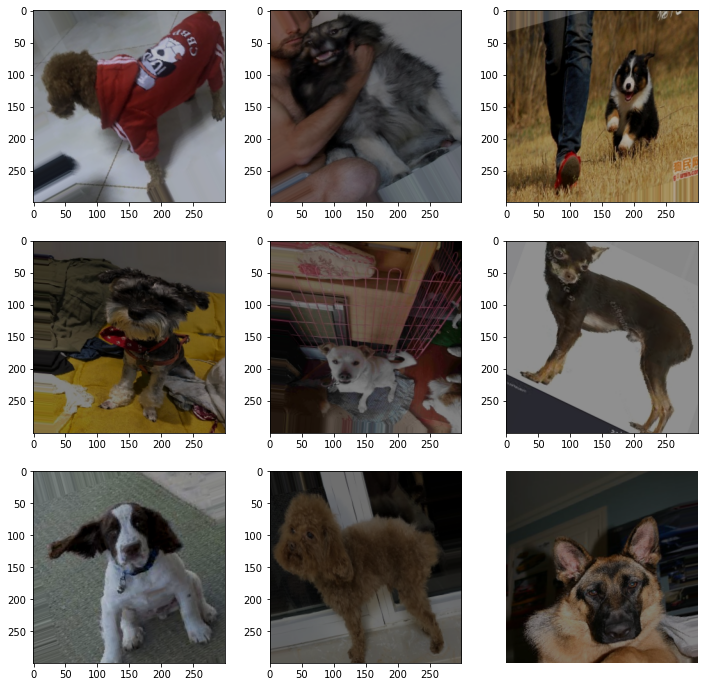

In [12]:
image_generator_train = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, brightness_range=[0.4, 1], channel_shift_range=30,
    rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=15, zoom_range=0.1, horizontal_flip=True
)
data_generator_train = image_generator_train.flow_from_directory(
    batch_size=BATCH_SIZE, directory=TRAINING_SET_DIR, shuffle=True,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT), class_mode="categorical"
)

image_generator_validation = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
data_generator_validation = image_generator_validation.flow_from_directory(
    batch_size=BATCH_SIZE, directory=VALIDATION_SET_DIR,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT), class_mode="categorical"
)

sample_images_train, _ = next(data_generator_train)

"""Displays the first NxM images in a NxM subplot"""

fig, ax = plt.subplots(3, 3, figsize=(12, 12))
index = 0

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(sample_images_train[index])
        plt.axis("off")
        index += 1

plt.show()

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, 3, padding="same", activation="relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64, 3, padding="same", activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(130, activation="softmax"))

In [7]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
history = model.fit_generator(
    data_generator_train, steps_per_epoch=65228//BATCH_SIZE, epochs=EPOCHS,
    validation_data=data_generator_validation, validation_steps=5200//BATCH_SIZE
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
 187/4076 [>.............................] - ETA: 30:13 - loss: 4.1942 - accuracy: 0.1128

KeyboardInterrupt: 

In [ ]:
accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
validation_loss = history.history["val_loss"]

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(EPOCHS, accuracy, label="Training Accuracy")
plt.plot(EPOCHS, validation_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(EPOCHS, loss, label="Training Loss")
plt.plot(EPOCHS, validation_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()